In [1]:
import os
from google.cloud import bigquery
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/caoshengyuan/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [2]:
# !pip install seaborn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns

In [4]:
# %%bigquery data
# SELECT * 
# FROM `broadband-data.capstone.blockgroup_2020`

data = """
SELECT BlockGroupCode,
       deploymentRate,
       pop / NULLIF(landArea, 0) AS popDensity,
       unemploymentRate,
       houseOwnerRate,
       maleRate,
       ageUnder17Rate,
       ageBetween18and24Rate,
       ageAbove65Rate,
       income AS medianIncome,
       aboveHighSchoolRate,
       aboveBachelorRate,
       whiteRate,
       MovedIn1yearRate,
       newlyMovedRate,
       Latitute,
       Longitude
FROM `broadband-data.capstone.blockgroup_2020`
WHERE SUBSTR(BlockGroupCode, 1, 2) != "02" and SUBSTR(BlockGroupCode, 1, 2) != "15"
"""

data = client.query(data).to_dataframe()

In [8]:
# data.shape

data.BlockGroupCode.nunique()

In [ ]:
fund_binary = """
select Census_Block_Group_Code, Binary_Fund_Block_Group_Code from
`broadband-data.usac_high_cost.Fund_Block_Group_Binary`
"""

In [ ]:
%%bigquery fund_binary
SELECT Census_Block_Group_Code, Binary_Fund_Block_Group_Code 
FROM `broadband-data.usac_high_cost.Fund_Block_Group_Binary`

In [ ]:
fund_binary

In [ ]:
fund_binary.describe()

In [ ]:
%%bigquery fund_num
SELECT Census_Block_Group_Code, Fund_Num_Block_Group 
FROM `broadband-data.usac_high_cost.Fund_Block_Group_Num`

In [ ]:
fund_num

In [ ]:
fund_num.describe()

In [ ]:
%%bigquery vote_and_householdPerMile
SELECT Blockgroup_Geoig as block_group_code, 
VOTING_REP, VOTING_DEM, VOTING_LIB, VOTING_OTH, householdPerMile
FROM broadband-data.capstone.HouseUnits_Voting_BG_2

In [ ]:
vote_and_householdPerMile.block_group_code.nunique()

In [ ]:
vote_and_householdPerMile.info()

In [99]:
%%bigquery data
SELECT BlockGroupCode, 
       deploymentRate,
       popDensity,
       houseRoadDensity,
       unemploymentRate,
       houseOwnerRate,
       maleRate,
       ageUnder17Rate,
       ageBetween18and24Rate,
       ageAbove65Rate,
       medianIncome,
       aboveHighSchoolRate,
       aboveBachelorRate,
       whiteRate,
       MovedIn1yearRate,
       newlyMovedRate,
       demRatio, # democratic voting percentage 
       avgAnnualTemp,
       snowResideTime, 
       Binary_Fund_Block_Group_Code as Binary_fund,
       Fund_Num_Block_Group as Fund_Num                
FROM

(SELECT  
       BlockGroupCode, 
       deploymentRate,
       pop / NULLIF(landArea, 0) AS popDensity,
       houseRoadDensity, # household per meter
       unemploymentRate,
       houseOwnerRate,
       maleRate,
       ageUnder17Rate,
       ageBetween18and24Rate,
       ageAbove65Rate,
       income AS medianIncome,
       aboveHighSchoolRate,
       aboveBachelorRate,
       whiteRate,
       MovedIn1yearRate,
       newlyMovedRate,
       demRatio, 
       avgAnnualTemp,
       snowResideTime
  
FROM `broadband-data.capstone.blockgroup_2020`
WHERE SUBSTR(BlockGroupCode, 1, 2) != "02" and SUBSTR(BlockGroupCode, 1, 2) != "15"
) as a
left join (
SELECT Census_Block_Group_Code, Binary_Fund_Block_Group_Code 
FROM `broadband-data.usac_high_cost.Fund_Block_Group_Binary`
) as b on a.BlockGroupCode = b.Census_Block_Group_Code
left join (
SELECT Census_Block_Group_Code, Fund_Num_Block_Group 
FROM `broadband-data.usac_high_cost.Fund_Block_Group_Num`
) as c on a.BlockGroupCode = c.Census_Block_Group_Code

Downloading: 100%|█████████████████| 208950/208950 [00:02<00:00, 72056.95rows/s]


In [100]:
data

,BlockGroupCode,deploymentRate,popDensity,houseRoadDensity,unemploymentRate,houseOwnerRate,maleRate,ageUnder17Rate,ageBetween18and24Rate,ageAbove65Rate,...,aboveHighSchoolRate,aboveBachelorRate,whiteRate,MovedIn1yearRate,newlyMovedRate,demRatio,avgAnnualTemp,snowResideTime,Binary_fund,Fund_Num
0,240037401023,0.921751,530.631480,0.018007,0.000000,0.512433,0.519538,0.130551,0.163410,0.175844,...,0.831447,0.593711,0.833037,0.095915,0.034636,0.715198,13.405048,12.033084,<NA>,<NA>
1,310539644001,0.984882,315.650173,0.008037,0.090837,0.710682,0.519869,0.326650,0.079475,0.123952,...,0.765500,0.154696,0.935108,0.144349,0.079075,0.312402,10.682625,47.569304,1,1
2,040130405181,0.543803,13.435978,0.001997,0.078335,0.847551,0.376414,0.145396,0.011309,0.305331,...,0.939974,0.184547,0.949919,0.090860,0.055165,0.257031,20.335284,0.000000,1,1
3,010770115023,0.332420,115.973072,0.003960,0.023769,0.970097,0.503078,0.239226,0.076517,0.188215,...,0.991003,0.390746,0.963940,0.080252,0.023445,0.181746,15.998424,0.000000,1,1
4,270054509001,0.410920,5.868356,0.000651,0.024324,0.906849,0.495890,0.267123,0.060274,0.169863,...,0.932790,0.266802,0.954795,0.048143,0.048143,0.327561,5.280309,78.768621,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208945,060710104212,1.000000,2417.777778,0.043897,0.153607,0.129902,0.490809,0.304126,0.277574,0.048407,...,0.924805,0.127441,0.732435,0.370249,0.164482,0.473796,20.674316,0.000000,<NA>,<NA>
208946,517100011001,1.000000,10757.352941,0.203268,0.183077,0.038961,0.529050,0.214627,0.269310,0.025290,...,0.841060,0.193377,0.438824,0.654225,0.135915,0.689837,16.184836,0.000000,<NA>,<NA>
208947,291019800001,1.000000,1326.258843,0.011089,0.044643,0.033881,0.641983,0.221525,0.443364,0.000000,...,0.962547,0.348315,0.842485,0.522291,0.390823,0.289344,13.099399,25.035203,<NA>,<NA>
208948,360450606004,1.000000,297.437182,0.015636,0.026882,0.219498,0.564693,0.230704,0.193938,0.021050,...,0.964878,0.292195,0.603424,0.505539,0.304082,0.390278,7.677019,79.634860,<NA>,<NA>


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208950 entries, 0 to 208949
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BlockGroupCode         208950 non-null  object 
 1   deploymentRate         208743 non-null  float64
 2   popDensity             208760 non-null  float64
 3   houseRoadDensity       208902 non-null  float64
 4   unemploymentRate       208066 non-null  float64
 5   houseOwnerRate         207887 non-null  float64
 6   maleRate               208324 non-null  float64
 7   ageUnder17Rate         208324 non-null  float64
 8   ageBetween18and24Rate  208324 non-null  float64
 9   ageAbove65Rate         208324 non-null  float64
 10  medianIncome           201658 non-null  Int64  
 11  aboveHighSchoolRate    208265 non-null  float64
 12  aboveBachelorRate      208265 non-null  float64
 13  whiteRate              208324 non-null  float64
 14  MovedIn1yearRate       208324 non-nu

In [98]:
# data.dropna(inplace=True)

In [102]:
data.Binary_fund.fillna(0,inplace=True) # impute with 0, no fund received 

In [103]:
data.Fund_Num.fillna(0,inplace=True)

In [104]:
# check fund
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208950 entries, 0 to 208949
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BlockGroupCode         208950 non-null  object 
 1   deploymentRate         208743 non-null  float64
 2   popDensity             208760 non-null  float64
 3   houseRoadDensity       208902 non-null  float64
 4   unemploymentRate       208066 non-null  float64
 5   houseOwnerRate         207887 non-null  float64
 6   maleRate               208324 non-null  float64
 7   ageUnder17Rate         208324 non-null  float64
 8   ageBetween18and24Rate  208324 non-null  float64
 9   ageAbove65Rate         208324 non-null  float64
 10  medianIncome           201658 non-null  Int64  
 11  aboveHighSchoolRate    208265 non-null  float64
 12  aboveBachelorRate      208265 non-null  float64
 13  whiteRate              208324 non-null  float64
 14  MovedIn1yearRate       208324 non-nu

In [106]:
# drop only rows with nan in deploymentRate using subset
data = data.dropna() 

In [108]:
len(data)

201559

In [109]:
data = data.drop('BlockGroupCode',axis=1)

In [110]:
y = data["deploymentRate"]
X = data.drop(["deploymentRate"],axis=1)

In [111]:
cols_to_norm = X.columns
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

In [112]:
X.shape,y.shape

((201559, 19), (201559,))

In [113]:
X.columns

Index(['popDensity', 'houseRoadDensity', 'unemploymentRate', 'houseOwnerRate',
       'maleRate', 'ageUnder17Rate', 'ageBetween18and24Rate', 'ageAbove65Rate',
       'medianIncome', 'aboveHighSchoolRate', 'aboveBachelorRate', 'whiteRate',
       'MovedIn1yearRate', 'newlyMovedRate', 'demRatio', 'avgAnnualTemp',
       'snowResideTime', 'Binary_fund', 'Fund_Num'],
      dtype='object')

In [16]:
# !pip install sklearn

In [23]:
# !pip install scipy

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [117]:
model = DecisionTreeRegressor(min_samples_split=2000)
model.fit(X_dev,y_dev)

y_dev_pred_prune = model.predict(X_dev)
y_test_pred_prune = model.predict(X_test)

print("performance on development data")
print(model.score(X_dev,y_dev))

print("performance on test data")
print(model.score(X_test, y_test))

performance on development data
0.45572813510445676
performance on test data
0.4340545044224011


In [118]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
model = HistGradientBoostingRegressor() # No feature importance, min_samples_split=2000
model.fit(X_dev,y_dev)

y_dev_pred_prune = model.predict(X_dev)
y_test_pred_prune = model.predict(X_test)

print("performance on development data")
print(model.score(X_dev,y_dev))

print("performance on test data")
print(model.score(X_test, y_test))

performance on development data
0.519790047194151
performance on test data
0.479813433405859


In [127]:
# rand_impor = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Decision Tree Feature Importance'])
# rand_impor.sort_values(by=['Decision Tree Feature Importance'],ascending = False)

In [128]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=1000)
model.fit(X_dev,y_dev)

y_dev_pred_prune = model.predict(X_dev)
y_test_pred_prune = model.predict(X_test)

print("performance on development data")
print(model.score(X_dev,y_dev))

print("performance on test data")
print(model.score(X_test, y_test))

performance on development data
0.4743130524880955
performance on test data
0.45388434895317764


In [129]:
rand_impor = pd.DataFrame(index=X.columns,data = model.feature_importances_,columns=['Random Forest Feature Importance'])
rand_impor.sort_values(by=['Random Forest Feature Importance'], ascending = False)

,Random Forest Feature Importance
popDensity,0.788129
houseRoadDensity,0.069823
avgAnnualTemp,0.042859
snowResideTime,0.030802
Binary_fund,0.017235
whiteRate,0.010576
demRatio,0.007716
Fund_Num,0.007311
medianIncome,0.005744
aboveBachelorRate,0.005457


In [ ]:
# choose 4 features to re-run the model 

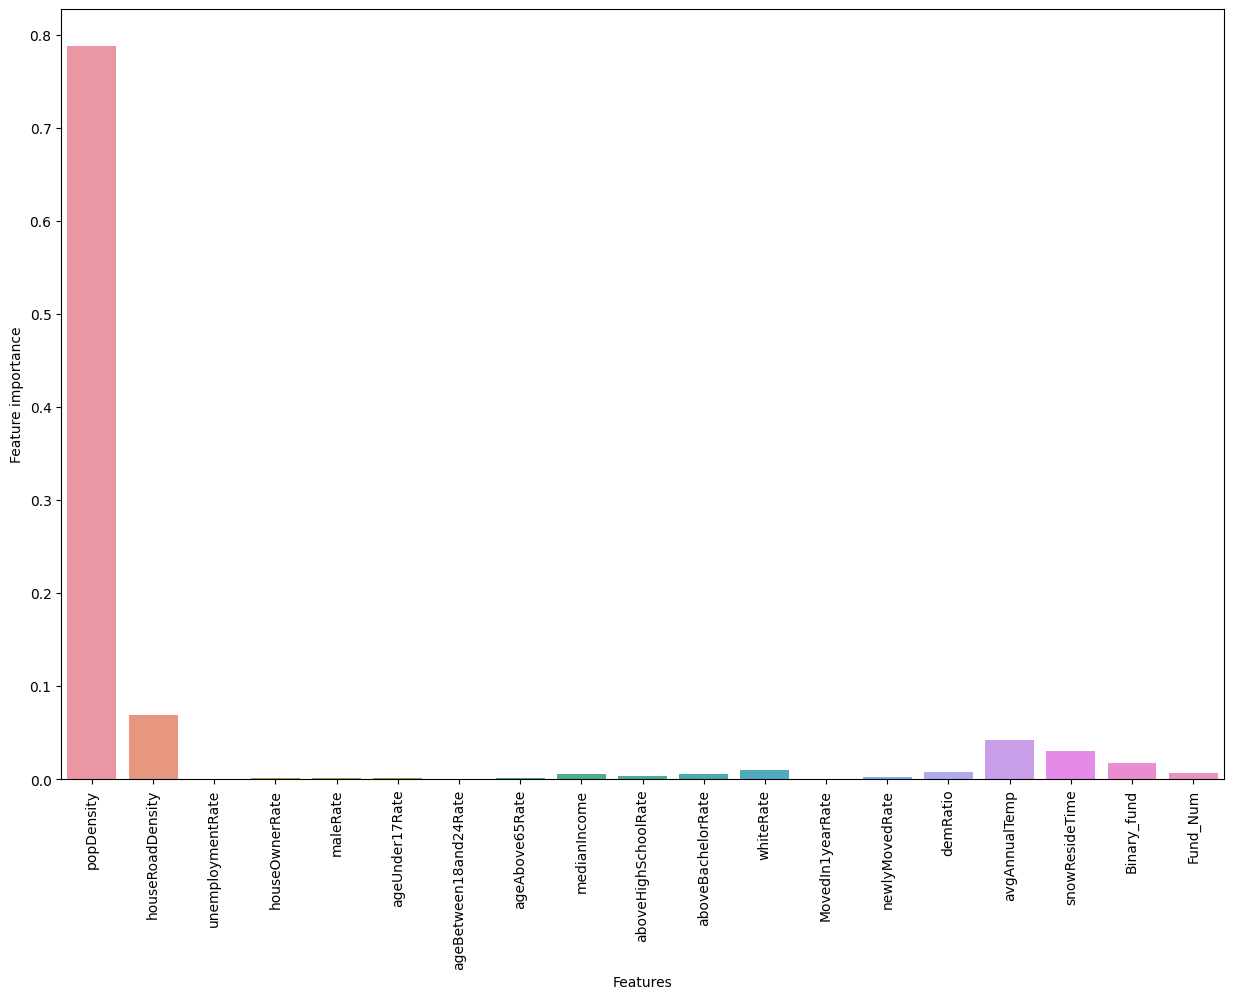

In [130]:
plt.figure(figsize=(15,10))
labels = X.columns.to_list()

p = sns.barplot(x=labels, y= model.feature_importances_.flatten());  # flatten() returns a copy of an array collapsed into one dimension.
p.set(xlabel = "Features", ylabel = "Feature importance");
p.tick_params(axis='x',rotation =90)

In [131]:
y_new = data["deploymentRate"]
X_new = data[['popDensity','houseRoadDensity','avgAnnualTemp','Binary_fund']]

In [132]:
cols_to_norm = X_new.columns
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

In [136]:
X_dev_new, X_test_new, y_dev_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [137]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=1000)
model.fit(X_dev_new,y_dev_new)

y_dev_pred_prune_new = model.predict(X_dev_new)
y_test_pred_prune_new = model.predict(X_test_new)

print("performance on development data")
print(model.score(X_dev_new,y_dev_new))

print("performance on test data")
print(model.score(X_test_new, y_test_new))

performance on development data
0.4559923072615315
performance on test data
0.44097701002595413
